# Goal: Work with group on the Regression Modeling of the Baseball Players dataset 

* Will divide the class into the groups, the best way is to randomly divide the group
* Each group will work on the problem together
* I will join the groups and answer the questions from time to time
* Once you guys complete the work, each of the group will present the findings to the class

## Day 1 Task

* 1.)  Explore the data, and visualize the data from multiple avenues
* 2.)  Change the categorical variables to the numerical variables using appropriate method 
* 3.)  You may want to do some feature engineering to create the meaningful predictors
* 4.)  Create the 80/20 train test split and then standardize the data
* 5.)  Run the Simple linear regression for each predictor with the Salary being the target variable
* 6.)  Explain the relationship of each individual predictor with the target variable
* 7.)  Write the simple linear regression equation
* 8.)  Discuss which variable is the most significant predictor of the players' salary
* 9.)  Explore the various accuracy measures such as MAPE, RMSE, R^2. What do those values mean in terms of your problem? Explain.
* 10.) Perform multiple linear regression taking three predictors that you observe most relevant for predicting salary.
* 11.) Discuss your observations.
* 12.) Provide a summary of the result.



* Plan for the 1-2 minutes informal presentation of your findings to the class.

Note: At the end of the session, each group will present the findings to the class and email single main copy of their notebook representing groups overall  achievement

## Baseball Players dataset description





#### Major League Baseball Data from the 1986 and 1987 seasons.
** A data frame with 322 observations of major league players on the following 20 variables **

* AtBat: Number of times at bat in 1986
* Hits: Number of hits in 1986
* HmRun: Number of home runs in 1986
* Runs: Number of runs in 1986
* RBI: Number of runs batted in in 1986
* Walks: Number of walks in 1986
* Years: Number of years in the major leagues
* CAtBat: Number of times at bat during his career
* CHits: Number of hits during his career
* CHmRun: Number of home runs during his career
* CRuns: Number of runs during his career
* CRBI: Number of runs batted in during his career
* Walks: Number of walks during his career
* League: A factor with levels A and N indicating player's league at the end of 1986
* Division: A factor with levels E and W indicating player's division at the end of 1986
* PutOuts: Number of put outs in 1986
* Assists: Number of assists in 1986
* Errors: Number of errors in 1986
* Salary: 1987 annual salary on opening day in thousands of dollars
* NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987
	
		
		






		
		
		

		

		

## Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import RidgeCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

pd.set_option('display.max_columns',200) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('ggplot') # a style that can be used for plots - see style reference above

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## 1.)  Explore the data and visualize the data from multiple avenues

# Read the data 

In [ ]:
df_Hi = pd.read_csv('Dataset/BaseballPlayersData.csv')
df_Hi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     322 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [ ]:
df_Hi.describe()

In [ ]:
df_Hi.head()

# Missing Values

In [ ]:
# Count the number of missing values in each column
print(df_Hi.isnull().sum())

## Visualizations

#### Histogram for numerical variables

In [ ]:
df_Hi.hist(figsize=(12, 8))
plt.show()

#### Count Plots for Categorical Variables

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='League', data=df_Hi)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Division', data=df_Hi)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='NewLeague', data=df_Hi)
plt.show()

### 2.)  Converting Categorical Variables to Numerical Variables

In [ ]:
#Create prefix for dummy variables
var_dummy_prefix_NL = "NewLeague"
var_dummy_prefix_D = 'Division'
var_dummy_prefix_L = 'League'

#Find the highest count category
# -----------New League -------------#
df_dummy_NL = pd.DataFrame(df_Hi['NewLeague'].value_counts().reset_index())
var_dummy_NL = df_dummy_NL.iloc[0, 0]

# -----------Division----------------#
df_dummy_D = pd.DataFrame(df_Hi['Division'].value_counts().reset_index())
var_dummy_D = df_dummy_D.iloc[0, 0]

# -----------League----------------#
df_dummy_L = pd.DataFrame(df_Hi['League'].value_counts().reset_index())
var_dummy_L = df_dummy_L.iloc[0, 0]

#Create variable to drop the highest count column
var_dumpre_NL = var_dummy_prefix_NL + "_" +  var_dummy_NL
var_dumpre_D = var_dummy_prefix_D + "_" +  var_dummy_D
var_dumpre_L = var_dummy_prefix_L + "_" +  var_dummy_L

#Create dummy variables
New_League_Dummies = pd.get_dummies(df_Hi['NewLeague'], drop_first = False, prefix=var_dummy_prefix_NL)
Division_Dummies = pd.get_dummies(df_Hi['Division'], drop_first = False, prefix=var_dummy_prefix_D)
League_Dummies = pd.get_dummies(df_Hi['League'], drop_first = False, prefix=var_dummy_prefix_L)

#Drop the highest count dummy variable
New_League_Dummies = New_League_Dummies.drop(var_dumpre_NL, axis = 1)
Division_Dummies = Division_Dummies.drop(var_dumpre_D, axis = 1)
League_Dummies = League_Dummies.drop(var_dumpre_L, axis = 1)

In [ ]:

df_Hi = pd.concat([df_Hi, League_Dummies,Division_Dummies,New_League_Dummies], axis=1)
df_Hi = df_Hi.drop(['League','Division','NewLeague'], axis=1)
df_Hi.info()

#### 3.)  Create the Meaningful Predictors

In [ ]:
med_sal = df_Hi['Salary'].median()

df_Hi['Abov_Med_Salary'] = df_Hi['Salary'].apply(lambda x: 1 if x > med_sal else 0)

df_Hi.head()


### 4.)  Create the 80/20 train test split and then standardize the data

In [ ]:
# keep features only for X
X = df_Hi.drop('Salary', axis = 1)

# keep target variable only for y
Y = df_Hi['Salary'] 

# split the train test, here we are doing 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Standardizing the Data

In [ ]:
sc = StandardScaler()
# fit the data i.e calculate the mean and sd of each coluns of X_train
sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

### 5.)  Run the Simple linear regression for each predictor with the Salary being the target variable

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

predictors = X_train_sc.columns

r_squared_values = []
coefficients = []

for predictor in predictors:
    X_train_predictor = X_train_sc[[predictor]]
    X_test_predictor = X_test_sc[[predictor]]
    
    lr.fit(X_train_predictor, Y_train)
    
    predictions = lr.predict(X_test_predictor)
    
    # Calculate and print the R-squared score
    r_squared = lr.score(X_test_predictor, Y_test)
    r_squared_values.append(r_squared)
    coefficients.append(lr.coef_)
    
for i in range(len(r_squared_values)):
    print(f"R-squared score for {predictors[i]}: {r_squared_values[i]}")
    print(f"Coefficient for {predictors[i]}: {coefficients[i]}")

#### 6. Explain the relationship of each individual predictor with the target variable

The R-squared score for each predictor indicates the estimated effect of the predictor on the target variable.

### 7.  Write the Simple Linear Regression Equation

In [ ]:
slope = lr.coef_[0]  # Coefficient of the predictor
intercept = lr.intercept_ 

print(f"Simple Linear Regression Equation: Salary = (Coefficient * Predictor) + Intercept")

# Equation for Career At Bat:
print(f"Career At-Bat Equation: Salary = ({coefficients[7]} * Career At-Bats) + {intercept}")

# Equation for Career Hits:
print(f"Career Hits Equation: Salary = ({coefficients[8]} * Career Hits) + {intercept}")

# Equation for Career Home Runs:
print(f"Career Home Run Equation: Salary = ({coefficients[9]} * Career Home Runs) + {intercept}")

# Equation for Career Runs:
print(f"Career Runs Equation: Salary = ({coefficients[10]} * Career Runs) + {intercept}")

# Equation for Career Runs Batted:
print(f"Career Runs Batted Equation: Salary = ({coefficients[11]} * Career Runs Batted) + {intercept}")

#### 8.)  Discuss which variable is the most significant predictor of the players' salary

The CAtBat, CHits, CHmRun, CRuns, and CRBI variables have the highest R-Squared value. This indicates that these variables have the highest estimated effect on the player's salary.

#### 9.) Explore the various accuracy measures such as MAPE, RMSE, R^2. What do those values mean in terms of your problem? Explain.

In [ ]:
# Calculate the estimated y values using the test dataset
y_hat_test = predictions

test_mse = mean_squared_error(Y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(Y_test, y_hat_test)
test_r_squared = r2_score(Y_test, y_hat_test)
test_mape = mean_absolute_percentage_error(Y_test, y_hat_test)

print(f'The test RMSE is:\t{round(test_rmse, 3)}')
print(f'The test MAE is:\t{round(test_mae, 3)}')
print(f'The test Rsquared is:\t{round(test_r_squared, 4)}')
print(f'The test MAPE is:\t{round(test_mape, 4)}')

#### 10.)  Perform multiple linear regression taking three predictors that you observe most relevant for predicting salary.

In [ ]:
#import the libraries
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
r2_sig_preds = ['CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI']
X_reg = X_train_sc[r2_sig_preds]
X_reg = sm.add_constant(X_reg) # adding a constant
reg1 = sm.OLS(np.asarray(Y_train), X_reg).fit() 
pred = reg1.predict(X_reg) 

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     25.92
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           4.44e-21
Time:                        11:37:27   Log-Likelihood:                -1854.6
No. Observations:                 257   AIC:                             3721.
Df Residuals:                     251   BIC:                             3743.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        526.2150     20.796     25.303      0.000     485.257     567.173
CAtBat      -940.0812    234.087     -4.016      0.000   -1401.106    -479.056
CHits        314.5538    321.312      0.979      0.329    -318.257     947.365
CHmRun      -136.8184    122.685     -1.115      0.266    -378.442     104.806
CRuns        605.2752    166.495      3.635      0.000     277.371     933.180
CRBI         356.8496    212.832      1.677      0.095     -62.314     776.014
==============================================================================
Omnibus:                       60.000   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.513
Skew:                           1.116   Prob(JB):                     6.18e-30
Kurtosis:                       5.753   Cond. No.                         42.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Drop CHits since it has a P value > 0.05.

X_reg = X_reg.drop('CHits', axis = 1)
X_reg = sm.add_constant(X_reg) # adding a constant
 
reg2 = sm.OLS(np.asarray(Y_train), X_reg).fit()
pred2 = reg2.predict(X_reg) 
 
reg2.summary()

## 11.) Discuss your observations.


We found that so-and-so predictor was the best indicator of salary for so-and-so reasons.

## 12.) Provide a summary of the result.

Summary goes here

### DATA DIVE Regression: DAY 2 Task
* At this point, you have already explored the data, created some visualizations, conduct the
feature engineering, and fitted the OLS regression models.





##  Step 1

## 1.)  Run the Multiple linear regression using all predictors with the Salary being the target variable

In [ ]:
X_reg = X_train_sc
X_reg = sm.add_constant(X_reg) # adding a constant
reg1 = sm.OLS(np.asarray(Y_train), X_reg).fit() 
pred = reg1.predict(X_reg) 

reg1.summary()

## 2.)  Use Backward elimination on the model for feature selection and build the final model

In [ ]:
count = len([i for i in reg1.params if i >= .05]) 

for i in range(0,count):
    index_max = max(range(len(reg1.pvalues)), key=reg1.pvalues.__getitem__)
    X_reg = X_reg.drop(X_reg.columns[index_max], axis = 1)
    X_reg = sm.add_constant(X_reg) # adding a constant
    reg1 = sm.OLS(np.asarray(Y_train), X_reg).fit() 
    pred = reg1.predict(X_reg) 
    count = len([i for i in reg1.params if i > .05]) 
    i+= 1

reg1.summary()


## 3.)  Explain the relationship of each individual predictor with the target variable

## 4.)  Write the multiple linear regression equation

## 5.)  Explore the various accuracy measures such as MAPE, RMSE, R^2. What do those values mean in terms of your problem? Explain.

## 6.)  Discuss with your group and provide a summary of the result.

## 7.)  Plan for the 3 minutes presentation of your findings to the class.

## Step 2

## 1.)  Run the Lasso regression using all predictors with the Salary being the target variable

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.297e+04, tolerance: 4.231e+03
  model = cd_fast.enet_coordinate_descent(


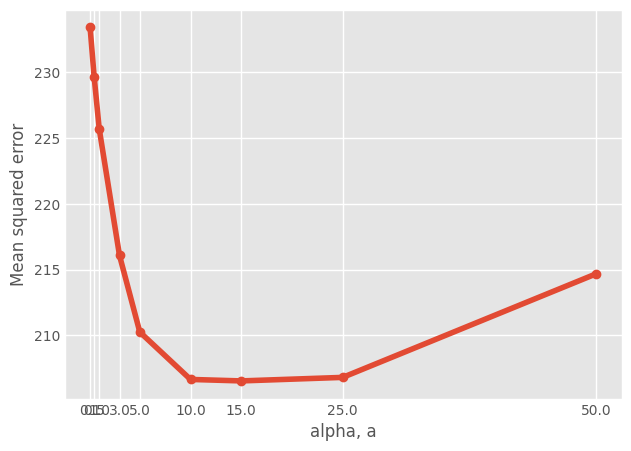

In [19]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np


#Code Block 41

alphas = [0.1, 0.5, 1, 3, 5, 10, 15, 25, 50] # here alpha is the lambda in the lecture note, the coefficient of lasso penalty
scores = []



for a in alphas:
    lasso = Lasso(alpha = a) 
    # Fit the Lasso regression model
    lasso.fit(X_train_sc, Y_train)
    predictions = lasso.predict(X_test_sc)
    scores.append(mean_absolute_error(Y_test, predictions))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('Mean squared error')
plt.xticks(alphas)
plt.show()

#Note: we should use the validation data to find the value of parameters rather than the test data


## 2.)  Use the grid search to find the best value of lambda in your lasso model and build the final model

## 3.)  Explore the relationship of each individual predictor with the target variable

## 4.)  List all the predictors that are considered insignificant by the lasso regression. Did you find anything interesting?

## 5.)  Write the lasso regression equation

## 6.)  Explore the various accuracy measures such as MAPE, RMSE, R^2. What do those values mean in terms of your problem? Explain.

## 7.)  Create some useful visualization that provides insights into the results.

## 8.)  Discuss with your group and provide a summary of the result.

## Step 3

## 1.)  Run the Ridge regression using all predictors with the Salary being the target variable

## 2.)  Use the grid search to find the best value of lambda in your Ridge model and build the final model

## 3.)  Explore the relationship of each individual predictor with the target variable

## 4.)  Is there any predictors that are considered insignificant by the Ridge regression?

## 5.)  Write the Ridge regression equation

## 6.)  Explore the various accuracy measures such as MAPE, RMSE, R^2. What do those values mean in terms of your problem? Explain.

## 7.)  Create some useful visualization that provides insights into the results.

## 8.)  Discuss with your group and provide a summary of the result.

## Step 4

## Plan for the 1-2 minutes informal presentation of your findings to the class.
Note: At the end of the session, each group will update to the class.